In [1]:
import load_data
import matplotlib.pyplot as plt
import numpy as np
from slam_utils import dead_rec_trajectory, get_local_movement, get_occupied_coords
from slam_map import SLAMMap

## Odometry Dead Reconing

In [2]:
WHEEL_DIAM = 254/100    # wheel diameter (dm)
BOT_WIDTH = 393.7/100   # distance from center of left wheel to center of right (dm)
SKID_FACTOR = 1.85  # made up scalar to account for effect of skid steering effective width for rotation

WHEEL_CIRC = np.pi*WHEEL_DIAM    # wheel circumference (mm)
ENC_TICK_LEN = WHEEL_CIRC / 360  # length of one encoder tick (mm)

In [3]:
slam20 = SLAMMap(map_shape=(600,600))  # create new map with bot in it

# Front Right, Front Left,... encoder readings, time
FR_enc, FL_enc, RR_enc, RL_enc, enc_ts = load_data.get_encoder('../data/Encoders20')

R_enc = (FR_enc + RR_enc) / 2  #average value of right encoders
L_enc = (FL_enc + RL_enc) / 2  #average value of left encoders

local20 = get_local_movement(R_enc, L_enc,
                             enc_tick_len = ENC_TICK_LEN, 
                             bot_width = BOT_WIDTH * SKID_FACTOR)


lidar20 = load_data.get_lidar('../data/Hokuyo20')

i = 0
j = 0
while ( (i < len(local20)) and (j < len(lidar20)) ):  # loop through movement and lidar in time-sequential order
    if (enc_ts[i] < lidar20[j]['t']):
        slam20.move_bot(local20[i])
        i += 1
    else:
        slam20.sense_walls(lidar20[j])
        j += 1
while (i < len(local20)):  # loop through any remaining movement
    slam20.move_bot(local20[i])
    i += 1
while (j < len(lidar20)):  # loop through any remaining lidar
    slam20.sense_walls(lidar20[j])
    j += 1


IndexError: index 603 is out of bounds for axis 1 with size 600

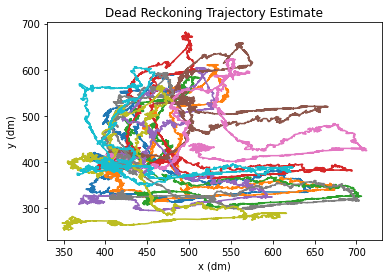

In [3]:
slam20 = SLAMMap(map_shape=(800,800), num_particles=10)  # create new map with bot in it

# Front Right, Front Left,... encoder readings, time
FR_enc, FL_enc, RR_enc, RL_enc, enc_ts = load_data.get_encoder('../data/Encoders20')

R_enc = (FR_enc + RR_enc) / 2  #average value of right encoders
L_enc = (FL_enc + RL_enc) / 2  #average value of left encoders

local20 = get_local_movement(R_enc, L_enc,
                             enc_tick_len = ENC_TICK_LEN, 
                             bot_width = BOT_WIDTH * SKID_FACTOR)


lidar20 = load_data.get_lidar('../data/Hokuyo20')

slam20.sense_walls(lidar20[0])

for move in local20:
    slam20.move_bot(move)
slam20.plot()

In [22]:
slam23 = SLAMMap()  # create new map with bot in it

# Front Right, Front Left,... encoder readings, time
FR_enc, FL_enc, RR_enc, RL_enc, ts = load_data.get_encoder('../data/Encoders23')

R_enc = (FR_enc + RR_enc) / 2  #average value of right encoders
L_enc = (FL_enc + RL_enc) / 2  #average value of left encoders

local23 = get_local_movement(R_enc, L_enc,
                             enc_tick_len = ENC_TICK_LEN, 
                             bot_width = BOT_WIDTH * SKID_FACTOR)


lidar23 = load_data.get_lidar('../data/Hokuyo23')

i = 0
j = 0
while ( (i < len(local23)) and (j < len(lidar23)) ):  # loop through movement and lidar in time-sequential order
    if (enc_ts[i] < lidar23[j]['t']):
        slam23.move_bot(local23[i])
        i += 1
    else:
        # slam23.sense_walls(lidar23[j])
        j += 1
while (i < len(local23)):  # loop through any remaining movement
    slam23.move_bot(local23[i])
    i += 1
while (j < len(lidar23)):  # loop through any remaining lidar
    # slam23.sense_walls(lidar23[j])
    j += 1

In [4]:
slam20.bot.pose.shape

(3,)

Text(0, 0.5, 'y (dm)')

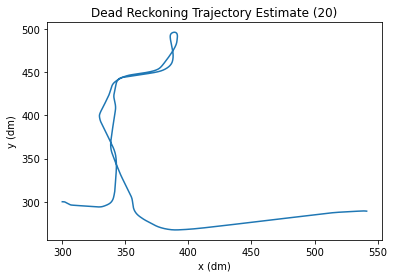

In [5]:
slam20.plot()
plt.title('Dead Reckoning Trajectory Estimate (20)')
plt.xlabel('x (dm)')
plt.ylabel('y (dm)')

Text(0, 0.5, 'y (dm)')

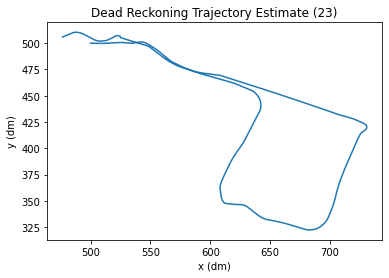

In [25]:
slam23.plot()
plt.title('Dead Reckoning Trajectory Estimate (23)')
plt.xlabel('x (dm)')
plt.ylabel('y (dm)')

## LIDAR Mapping

In [26]:
import MapUtils

In [27]:
MapUtils.getMapCellsFromRay(0,0,[10,10],[10,10])

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 1., 2., 3., 4., 5.,
        6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 1., 2., 3., 4., 5.,
        6., 7., 8., 9.]])

In [28]:
lidar20 = load_data.get_lidar('../data/Hokuyo20')

In [29]:
occ_coords = get_occupied_coords(np.asarray([300,300,0]), lidar20[0])

In [30]:
empty_coords = MapUtils.getMapCellsFromRay(300,300,occ_coords[:,0],occ_coords[:,1]).T

In [31]:
slam20.occ_grid_map.min()

0.0

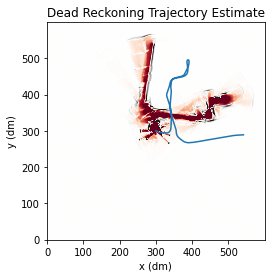

In [12]:

plt.imshow(slam20.occ_grid_map.T, origin='lower', cmap='RdGy', vmin = -30, vmax=30)
slam20.plot()

In [8]:
slam20.occ_grid_map.min()

-2812.3200000154093

In [34]:
import MapUtilsCython.MapUtils_fclad as mu

In [35]:
empty_coords = mu.getMapCellsFromRay_fclad(0,0,  # current bot pose
                                            occ_coords[:,0].astype(np.int16),occ_coords[:,1].astype(np.int16),  # ray end points
                                            600).astype(np.int32, copy=True).T  # map max

In [36]:
empty_coords.shape

(340014, 2)